> **NB**: The project was conducted by **BOLARINWA AISHAT** in partial fulfilment of the requirements for the **ALX-T Data Analyst Udacity NanoDegree Program**

# Project: No-Show Appointments (Data Investigation)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients showed up
for their appointment. A number of
characteristics about the patient are
included in each column.
>
>● **‘ScheduledDay’** tells us on
what day the patient set up their
appointment.
>
>● **‘Neighborhood’** indicates the
location of the hospital.
>
>● **‘Scholarship’** indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.


> **OBJECTIVE**: This report is aimed at answering a cogent question from the [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv), which is :
>
> ***What Factors determine whether or not, a patient will show up for their medical appointment?***
>
> For the purpose of this report, the factors affecting a patient's show up for their medical appointment will be grouped into :
>
> **1) Personal Factors** which includes
>- Age
>- Gender
>- Alcoholism
>- Hypertension
>- Diabetes
>- Whether or not, the patient is handicapped.
>
> **2) External Factors** : These are factors that are not in the patient's control and include :
>- Appointment Day (If it's the same or different from the Schedule Day) 
>- Scholarship ( Scholarship indicates whether or not the patient is enrolled in the Brazilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000).)
>- Whether or not, the patient recieved an SMS for reminder.


In [1]:
# Setting up import statements for all of the packages that will be used for the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# Loading the dataset, performing operations to inspect the data types 
# and looking for instances of missing or possibly errant data.

df = pd.read_csv(r'C:\Users\A BOLARINWA\Desktop\My Jupyter\DataSets\noshowappointments-kagglev2-may-2016.csv' ,encoding='latin1')

Lets have a look at the first ten rows of the dataset.

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Let's get some information about the columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above, we can deduce that none of the 14 columns have a missing value (ie non-null) and that 110527 data was provided. We will confirm this info in the next two lines

In [5]:
df.shape

(110527, 14)

The dataset consist of 110527 rows and 14 columns

In [6]:
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

There are no missing values in the dataset

In [7]:
# Checking for duplicates in the dataset

df.duplicated().any()

False

There are no duplicates in the dataset

In [8]:
# Generating a descriptive statistics that summerizes the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset has some errors that needs to be corrected such as the minimum age being a negative value, spelling errors and inconsistencies in the format of naming the columns. All these will be addressed in the next section.


### Data Cleaning (We want to detect and correct / remove inaccurate records from the dataset!)

In [9]:
# Creating a new column 'diff_day' to show when appointment day was later after the schedule day. 

df['diff_day'] = ( df.AppointmentDay > df.ScheduledDay ).astype(int)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,1


The new column has been created diff_day = 1 means that the appointment was a different day from the schedule day and diff_day = 0 means that the appointment was on the same day as the schedule day

In [10]:
# Removing columns that are not needed so as to reduce ambiguity

df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1, inplace=True)
df.head(10)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_day
0,F,62,0,1,0,0,0,0,No,0
1,M,56,0,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,0,No,0
5,F,76,0,1,0,0,0,0,No,1
6,F,23,0,0,0,0,0,0,Yes,1
7,F,39,0,0,0,0,0,0,Yes,1
8,F,21,0,0,0,0,0,0,No,0
9,F,19,0,0,0,0,0,0,No,1


Now, we have fewer and relevant columns to work with.

In [11]:
# Correcting spelling errors and inconsistencies in column naming format

df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.rename(columns = {'SMS_received':'Received_sms'}, inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.rename(columns = {'diff_day':'Diff_day'}, inplace = True)
df.head(10)

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Received_sms,No_show,Diff_day
0,F,62,0,1,0,0,0,0,No,0
1,M,56,0,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,0,No,0
5,F,76,0,1,0,0,0,0,No,1
6,F,23,0,0,0,0,0,0,Yes,1
7,F,39,0,0,0,0,0,0,Yes,1
8,F,21,0,0,0,0,0,0,No,0
9,F,19,0,0,0,0,0,0,No,1


The names of the columns look better and the format is now consistent.

In [12]:
# Rearranging the columns for easier flow

columns = ['No_show', 'Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
 'Scholarship', 'Received_sms','Diff_day']
df = df[columns]
df.head(10)

,No_show,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,Scholarship,Received_sms,Diff_day
0,No,F,62,1,0,0,0,0,0,0
1,No,M,56,0,0,0,0,0,0,0
2,No,F,62,0,0,0,0,0,0,0
3,No,F,8,0,0,0,0,0,0,0
4,No,F,56,1,1,0,0,0,0,0
5,No,F,76,1,0,0,0,0,0,1
6,Yes,F,23,0,0,0,0,0,0,1
7,Yes,F,39,0,0,0,0,0,0,1
8,No,F,21,0,0,0,0,0,0,0
9,No,F,19,0,0,0,0,0,0,1


Bravo! The data now looks better than it was before the cleaning.

Let's not forget the negative age.

In [13]:
# Removing the negative age

df['Age'].replace({-1: 1}, inplace=True)
df['Age'].min()

0

The age '-1' has been changed to '1' and now, the minimun age is no longer negative but 0 ( ie, newly born)

Let's take a final look at our cleaned data

In [14]:
df.head(10)

,No_show,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,Scholarship,Received_sms,Diff_day
0,No,F,62,1,0,0,0,0,0,0
1,No,M,56,0,0,0,0,0,0,0
2,No,F,62,0,0,0,0,0,0,0
3,No,F,8,0,0,0,0,0,0,0
4,No,F,56,1,1,0,0,0,0,0
5,No,F,76,1,0,0,0,0,0,1
6,Yes,F,23,0,0,0,0,0,0,1
7,Yes,F,39,0,0,0,0,0,0,1
8,No,F,21,0,0,0,0,0,0,0
9,No,F,19,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we're ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section : ***What Factors determine whether or not, a patient will show up for their medical appointment?***



First, Let's find out the percentage of patients that missed the appointment

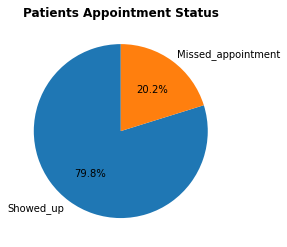

In [15]:
# plotting a pie chart to show the percentage of patients that missed their appointment

plt.pie(df['No_show'].value_counts(), labels = ['Showed_up', 'Missed_appointment'], startangle=90, 
        autopct='%1.1f%%')
       
# Giving the pie chart a suitable name

plt.title('Patients Appointment Status', fontweight='bold')

# Visualizing the pie chart

plt.show()

So, about twenty percent of the patients missed their appointment. This is fair enough but let's find out why.

We will plot a heatmap to show the correlation coefficients but, we have to convert No_show and Gender to binary state ( ie 0 and 1) for convenience

In [16]:
df['Gender']= df['Gender'].replace(["F"], 1)
df['Gender']= df['Gender'].replace(["M"], 0)
df['No_show']= df['No_show'].replace(["No"], 1)
df['No_show']= df['No_show'].replace(["Yes"], 0)

For the No_show column, 1 means the patient showed up and 0 means the patient didn't show up.                                   
For the Gender column, 1 represents female and 0 represents male

Let's take a brief look at our data again before plotting the heatmap.

In [17]:
df.head(10)

,No_show,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,Scholarship,Received_sms,Diff_day
0,1,1,62,1,0,0,0,0,0,0
1,1,0,56,0,0,0,0,0,0,0
2,1,1,62,0,0,0,0,0,0,0
3,1,1,8,0,0,0,0,0,0,0
4,1,1,56,1,1,0,0,0,0,0
5,1,1,76,1,0,0,0,0,0,1
6,0,1,23,0,0,0,0,0,0,1
7,0,1,39,0,0,0,0,0,0,1
8,1,1,21,0,0,0,0,0,0,0
9,1,1,19,0,0,0,0,0,0,1


<AxesSubplot:>

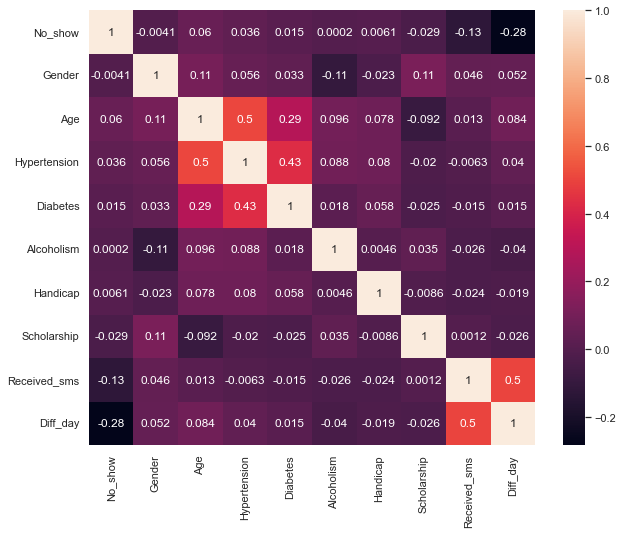

In [18]:
corr = df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot=True)

We can see the correlation between the different variables now. Moving forward;

### Research Question 1 

### Does personal factor such as age, gender and medical condition determine whether or not, a patient will miss their appointment?

>**1) Gender**

Remeber that 1 represents female and 0 represents male

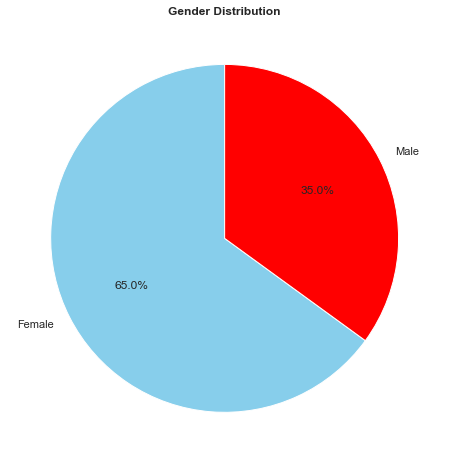

In [19]:
# plotting a pie chart to show the gender distribution in the dataset

plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], colors=['skyblue', 'red'], startangle=90, 
        autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Gender Distribution', fontweight="bold")

# Visualizing the pie chart

plt.show()

There are more females than males in the dataset.

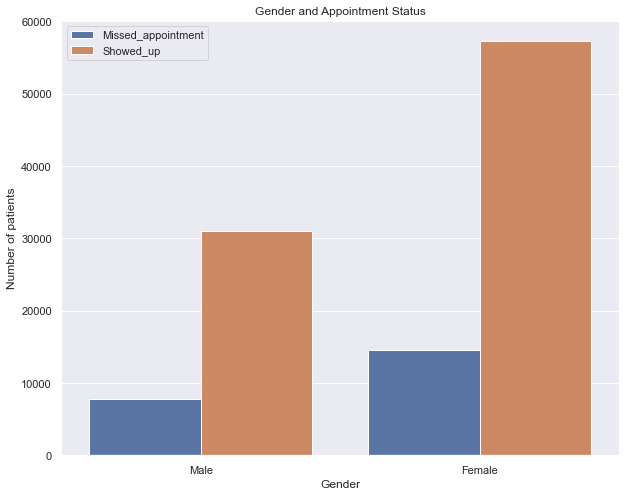

In [20]:
ax = sns.countplot(x='Gender', hue='No_show', data=df)
ax.set(title='Gender and Appointment Status')
plt.xticks([0, 1], ['Male', 'Female'])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

In [21]:
df['No_show'].corr(df['Gender'])

-0.0041186331993736565

The correlation between gender and Appointment status is very close to zero hence there is no correlation between them. (Gender does not affect whether or not, a patient will show up for their medical appointment

>**2) Age**

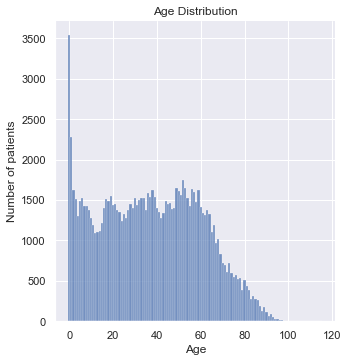

In [22]:
ax=sns.displot(df, x='Age', discrete=True).set(title='Age Distribution', xlabel='Age',
                                                ylabel= 'Number of patients')

Majority of the patients fall in the age range of 0 to 5 years

In [23]:
df['No_show'].corr(df['Age'])

0.060318981068027765

The correlation coefficient between Age and Appointment status is low but not as low as that of Gender and Appointment status, so, let's take a further look.

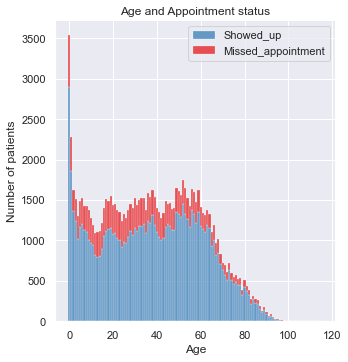

In [24]:
ax=sns.displot(df, x='Age', hue='No_show', multiple='stack', discrete=True, legend=False, 
               palette='Set1').set(title='Age and Appointment status', xlabel='Age', ylabel= 'Number of patients');
plt.legend(labels=['Showed_up', 'Missed_appointment',])
plt.show()

Patients who missed their appointment are more on the left side, hence, it can be said that younger patients are more likely to miss their appointment that older patients.

>**3) Health conditions**

> The various health conditions in this dataset are;
>
> -Hypertension
>
> -Diabetes
>
> -Alcoholism
>
> -Handicap
>
> For the purpose of this project, only Hypertension and Diabetes will be explored.

>**3A) Hypertension**

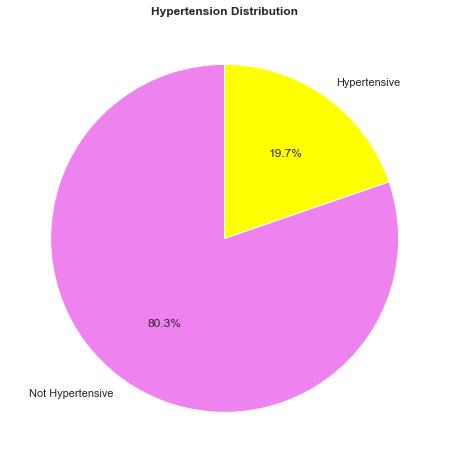

In [25]:
# plotting a pie chart to show the distribution of Hypertension in patients

plt.pie(df['Hypertension'].value_counts(), labels = ['Not Hypertensive', 'Hypertensive'], colors=['violet', 'yellow'],
        startangle=90, autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Hypertension Distribution', fontweight="bold")

# Visualizing the pie chart

plt.show()

19.7% of the patients have hypertention. Let's find the correlation between Hypertension in patients and their Appointment status

In [26]:
df['No_show'].corr(df['Hypertension'])

0.03570117734501482

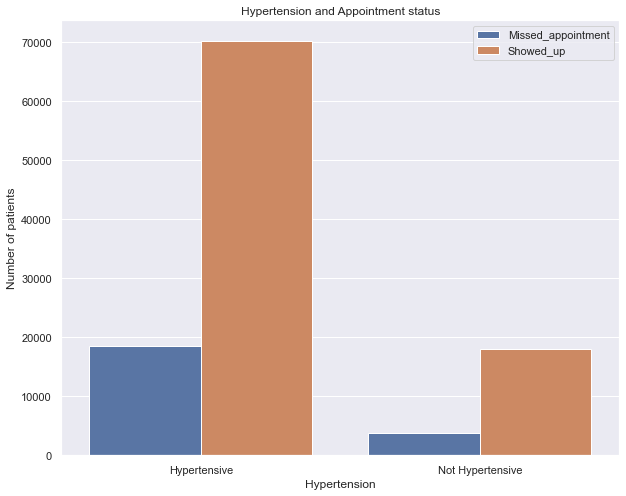

In [27]:
ax = sns.countplot(x='Hypertension', hue='No_show', data=df)
ax.set(title='Hypertension and Appointment status')
plt.xticks([0, 1], ['Hypertensive', 'Not Hypertensive'])
ax.set_xlabel('Hypertension')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

More hypertensive patients showed up for their appointment than non hypertensive patients and that's understandable.

>**3B) Diabetes**

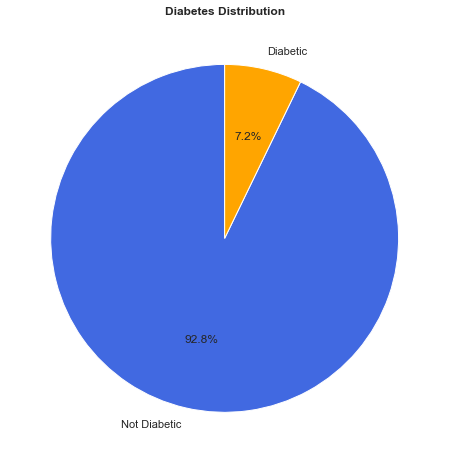

In [28]:
# plotting a pie chart to show the distribution of Diabetes in patients

plt.pie(df['Diabetes'].value_counts(), labels = ['Not Diabetic', 'Diabetic'], colors=['royalblue', 'orange'], 
        startangle=90, autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Diabetes Distribution', fontweight="bold")

# Visualizing the pie chart

plt.show()

Only 7.2% of the patients are diabetic. There are less diabetic patients than hypertensive patients.

In [29]:
df['No_show'].corr(df['Diabetes'])

0.015179943820773822

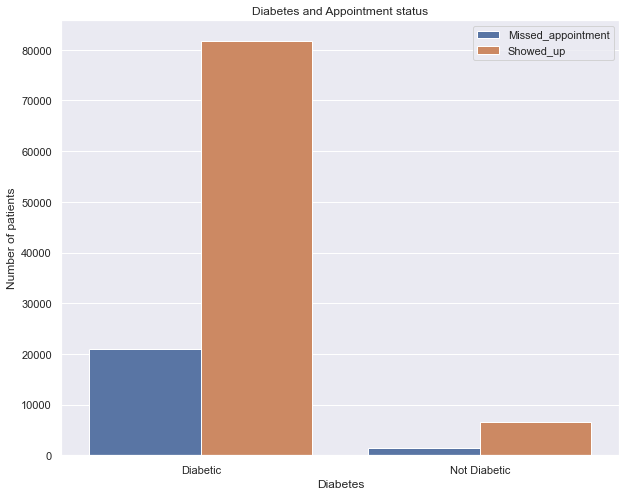

In [30]:
ax = sns.countplot(x='Diabetes', hue='No_show', data=df)
ax.set(title='Diabetes and Appointment status')
plt.xticks([0, 1], ['Diabetic', 'Not Diabetic'])
ax.set_xlabel('Diabetes')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

### Research Question 2 

### Does external factor such as scholarship, different schedule and appointment day and receiving sms determine whether or not, a patient will miss their appointment?

>**1) Scholarship**
>
> This is a Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000).

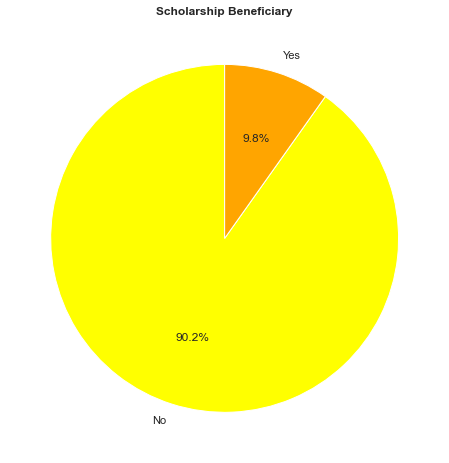

In [31]:
# plotting a pie chart to show the patients on the Bolsa Familia scholarship

plt.pie(df['Scholarship'].value_counts(), labels = ['No', 'Yes'], colors=['yellow', 'orange'], startangle=90, 
        autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Scholarship Beneficiary', fontweight="bold")

# Visualizing the pie chart

plt.show()

Oh no! Very few patients are benfitting from the scholarship.

In [32]:
df['No_show'].corr(df['Scholarship'])

-0.029135031314095085

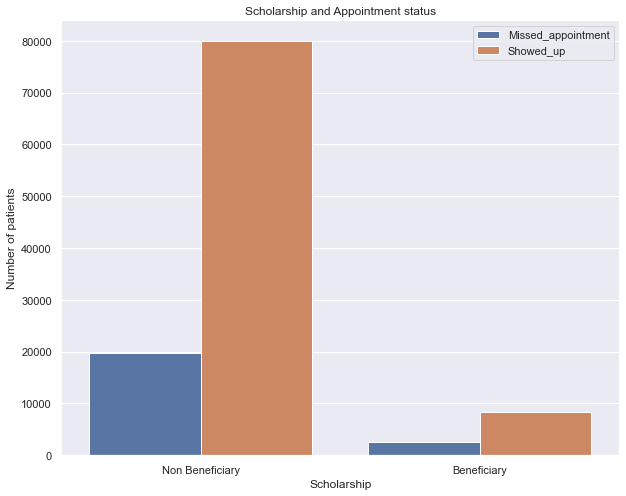

In [33]:
ax = sns.countplot(x='Scholarship', hue='No_show', data=df)
ax.set(title='Scholarship and Appointment status')
plt.xticks([0, 1], ['Non Beneficiary', 'Beneficiary'])
ax.set_xlabel('Scholarship')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

>**2) Different Schedule and appointment day**

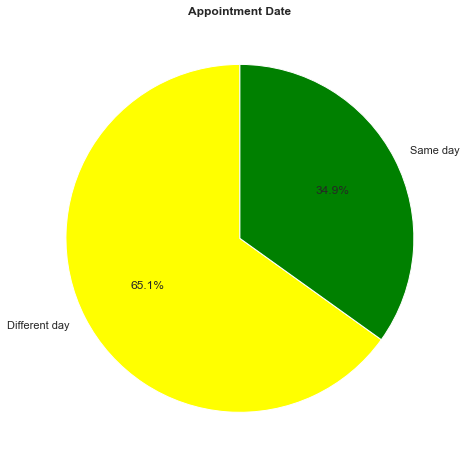

In [34]:
# plotting a pie chart to show the patients on that got a different appointment date

plt.pie(df['Diff_day'].value_counts(), labels = ['Different day', 'Same day'],colors=['yellow', 'green'] , startangle=90, 
        autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Appointment Date', fontweight="bold")

# Visualizing the pie chart

plt.show()

Most people got a different day appointment from their schedule day as seen in most healthcare facilities so, this is not strange.

In [35]:
df['No_show'].corr(df['Diff_day'])

-0.28328919614745646

Wow, The correlation is low but it's still the highest we've gotten so far. Safe to say that the highest determinant of a patient showing up for or missing their appointment is whether or not they got a same day appointment. We can't conclude yet, this is still exploratory stage. We are revealing more about our dataset.

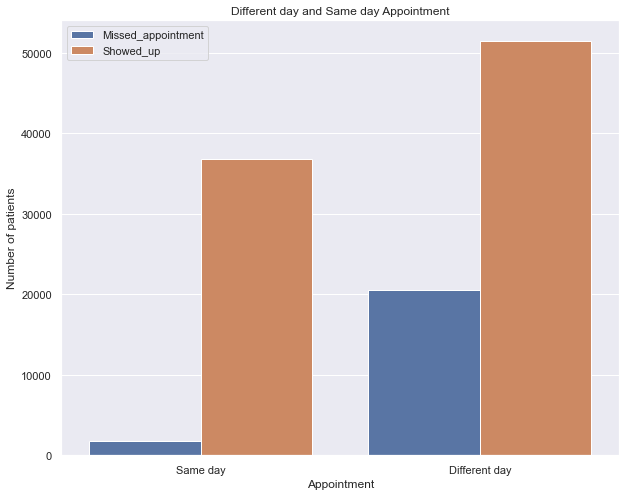

In [36]:
ax = sns.countplot(x='Diff_day', hue='No_show', data=df)
ax.set(title='Different day and Same day Appointment')
plt.xticks([0, 1], ['Same day','Different day'])
ax.set_xlabel('Appointment')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

As expected, less patients missed their appointment when it is the same day they scheduled it.

>**3) Received SMS**

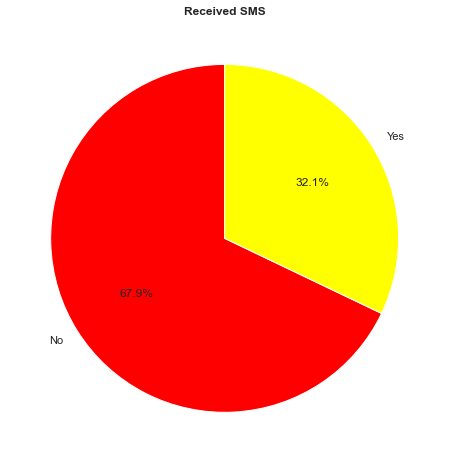

In [37]:
# plotting a pie chart to show the patients on that received reminder SMS

plt.pie(df['Received_sms'].value_counts(), labels = ['No', 'Yes'], colors=['red', 'yellow'], startangle=90, 
        autopct = '%1.1f%%')

# Giving the pie chart a suitable name

plt.title('Received SMS', fontweight="bold")

# Visualizing the pie chart

plt.show()

less patients received SMS reminder.

In [38]:
df['No_show'].corr(df['Received_sms'])

-0.12643065757314484

This is the second highest correlation in the dataset. Interesting how we are gradually unravelling the hidden answers in the dataset.

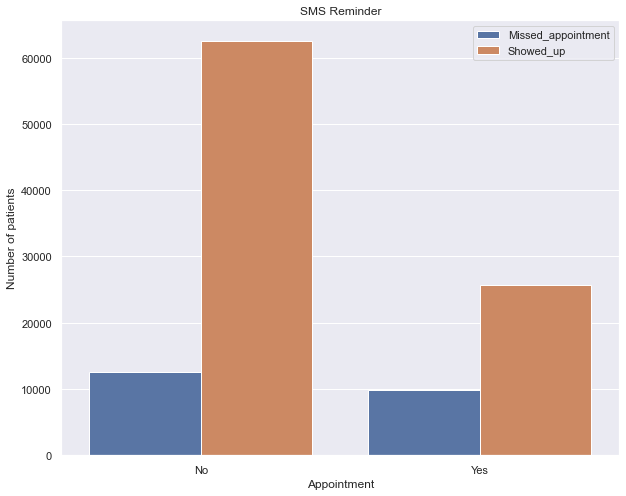

In [39]:
ax = sns.countplot(x='Received_sms', hue='No_show', data=df)
ax.set(title='SMS Reminder')
plt.xticks([0, 1], ['No','Yes'])
ax.set_xlabel('Appointment')
ax.set_ylabel('Number of patients')
L=plt.legend()
L.get_texts()[0].set_text('Missed_appointment')
L.get_texts()[1].set_text('Showed_up')
plt.show()

<a id='conclusions'></a>
## Conclusions

>This report analysed a dataset of 100k medical appointments of Brazilian patients and the aim was to answer the question of whether or not patients will show up for their appointment, considering personal and external factors.
>
> **Findings**:
>From the analysis, it was found that the most determinant factor of a patient missing or showing up for their appointment is whether they got their appointment on the same day of scheduling or not.
>
>Personal factors like age, gender and medical conditions, although, showed little to no correlation with patients not showing up for their appointment, It is important to note that patients who missed their appointments were younger. It is also worthy of note that having health conditions showed more correlation with patients not showing up for their appointment, in that, Patients with health conditions are less likely to miss their appointment.

>**Limitations**: More advanced statistical analysis could not be done due to the binary nature of the dataset.

